In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
# Charger les données
file_path = "../data/pokemon.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


/var/folders/m2/d1mw5wj10rdfwjr3_bnnrxwr0000gn/T/ipykernel_73514/1658887006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Type 1'], order=df['Type 1'].value_counts().index, palette='viridis')


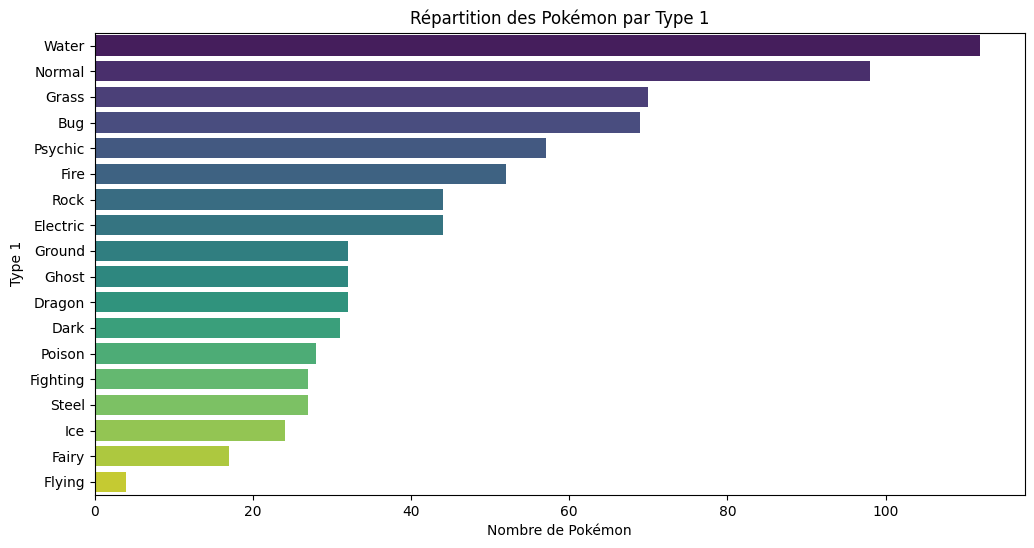

In [5]:
# Visualisation de la répartition des types
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Type 1'], order=df['Type 1'].value_counts().index, palette='viridis')
plt.title("Répartition des Pokémon par Type 1")
plt.xlabel("Nombre de Pokémon")
plt.ylabel("Type 1")
plt.show()

In [6]:
# Sélection des colonnes pertinentes
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [7]:
# Suppression des lignes avec valeurs manquantes
df = df.dropna(subset=features)

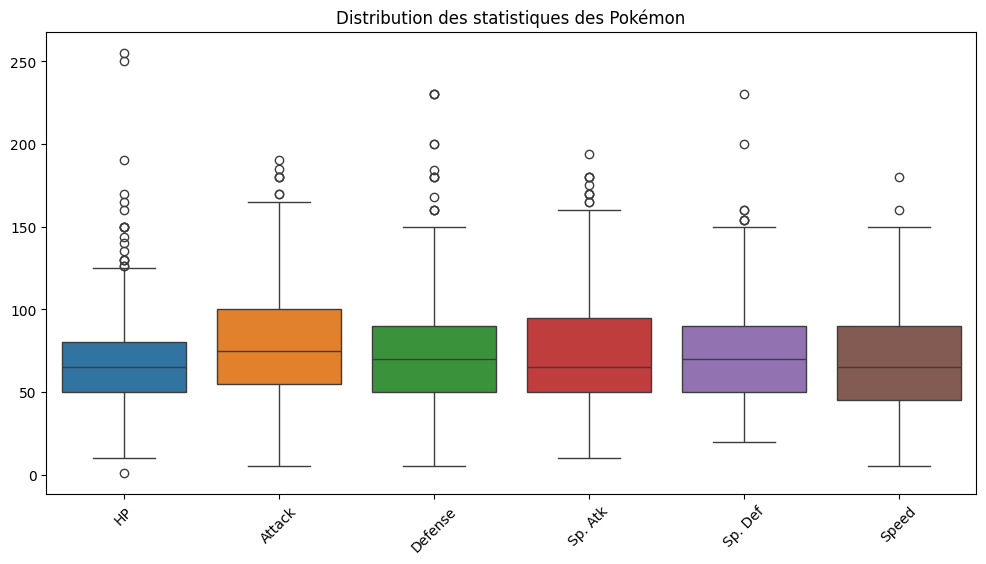

In [8]:
# Visualisation des distributions des statistiques
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.title("Distribution des statistiques des Pokémon")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Séparation des Pokémon légendaires et non-légendaires
legendary = df[df['Legendary'] == True]
non_legendary = df[df['Legendary'] == False]

In [10]:
# Normalisation des données
scaler = StandardScaler()
non_legendary_scaled = scaler.fit_transform(non_legendary[features])
legendary_scaled = scaler.transform(legendary[features])

In [11]:
# Création et entraînement du modèle k-NN
k = 5
nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
nn.fit(non_legendary_scaled)

NearestNeighbors(metric='euclidean')

In [12]:
# Fonction pour trouver les Pokémon similaires
def find_similar_pokemon(pokemon_name, k=5):
    if pokemon_name not in legendary['Name'].values:
        return f"Ce Pokémon ({pokemon_name}) n'est pas dans la liste des légendaires."
    
    pokemon_features = legendary[legendary['Name'] == pokemon_name][features].values
    pokemon_scaled = scaler.transform(pokemon_features)
    
    distances, indices = nn.kneighbors(pokemon_scaled)
    
    similar_pokemon = non_legendary.iloc[indices[0]].copy()
    similar_pokemon['Distance'] = distances[0]
    
    return similar_pokemon[['Name', 'Type 1', 'Type 2'] + features + ['Distance']]

In [13]:
# Pokémon légendaires du champion
champion_pokemon = ['Mewtwo', 'Lugia', 'Rayquaza', 'Giratina', 'Dialga', 'Palkia']

In [14]:
# Trouver et afficher les Pokémon similaires pour chaque Pokémon légendaire
for pokemon in champion_pokemon:
    print(f"\nPokémon similaires à {pokemon}:")
    similar = find_similar_pokemon(pokemon)
    
    if isinstance(similar, str):
        print(similar)
    else:
        print(similar.to_string(index=False))


Pokémon similaires à Mewtwo:
                 Name Type 1   Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Distance
        Mega Houndoom   Dark     Fire  75      90       90      140       90    115  1.586475
         Mega Pidgeot Normal   Flying  83      80       80      135       80    121  1.619294
            Hydreigon   Dark   Dragon  92     105       90      125       90     98  1.632042
        Mega Sceptile  Grass   Dragon  70     110       75      145       85    145  1.666335
Keldeo Resolute Forme  Water Fighting  91      72       90      129       90    108  1.812767

Pokémon similaires à Lugia:
         Name  Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Distance
    Cresselia Psychic    NaN 120      70      120       75      130     85  1.675385
Mega Venusaur   Grass Poison  80     100      123      122      120     80  2.321961
      Manaphy   Water    NaN 100     100      100      100      100    100  2.412453
          Mew Psychic    NaN 100     

/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/abedja/IaPM_WcS/env_wcs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScal